In [5]:
import pandas as pd

df = pd.read_csv("/Users/saanvidasa/Downloads/netflix_titles.csv")
print(df.head())       # View first 5 rows
print(df.columns)      # Check column names
print(df.shape)        # Check number of rows and columns


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [11]:
import pandas as pd

# Load dataset
df = pd.read_csv("/Users/saanvidasa/Downloads/netflix_titles.csv")


# 1. Drop duplicate rows
df = df.drop_duplicates()

# 2. Handle missing values
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['cast'] = df['cast'].fillna('Not Available')
df['director'] = df['director'].fillna('Not Available')

# 3. Drop rows where crucial info is missing
df = df.dropna(subset=['title', 'type', 'release_year', 'date_added'])

# 4. Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)

# 5. Extract year and month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# 6. Normalize text data: strip spaces
df['title'] = df['title'].str.strip()
df['director'] = df['director'].str.strip()
df['cast'] = df['cast'].str.strip()

# 7. Final check
print("Missing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nCleaned Data Sample:\n", df.head())


Missing values:
 show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      88
release_year     0
rating           0
duration         3
listed_in        0
description      0
year_added      88
month_added     88
dtype: int64

Data types:
 show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added             float64
month_added            float64
dtype: object

Cleaned Data Sample:
   show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water    Not Available   
2      s3  TV Show              G

/var/folders/w5/r7hx3wzn7b91pt590364gxkh0000gn/T/ipykernel_53865/1498140579.py:20: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)


In [12]:
# Drop rows with missing 'date_added' and 'duration'
df = df.dropna(subset=['date_added', 'duration'])

# Re-extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


In [13]:
print(df.isnull().sum())
print(df.info())


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 8706 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8706 non-null   object        
 1   type          8706 non-null   object        
 2   title         8706 non-null   object        
 3   director      8706 non-null   object        
 4   cast          8706 non-null   object        
 5   country       8706 non-null   object        
 6   date_added    8706 non-null   datetime64[ns]
 7   release_year  8706 non-null   int64         
 8   rating        8706 non-null   object        
 9   duration      8706 non-null   object        
 10  listed_in     8706 non-null 

/var/folders/w5/r7hx3wzn7b91pt590364gxkh0000gn/T/ipykernel_53865/132494506.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


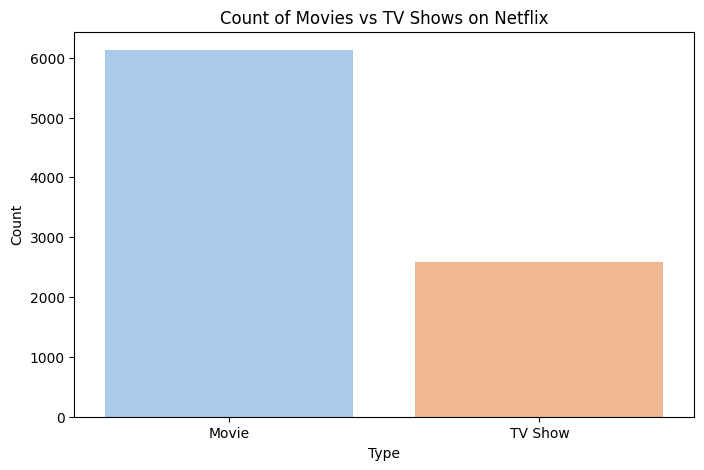

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='type', palette='pastel')
plt.title('Count of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


/var/folders/w5/r7hx3wzn7b91pt590364gxkh0000gn/T/ipykernel_53865/3691838196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


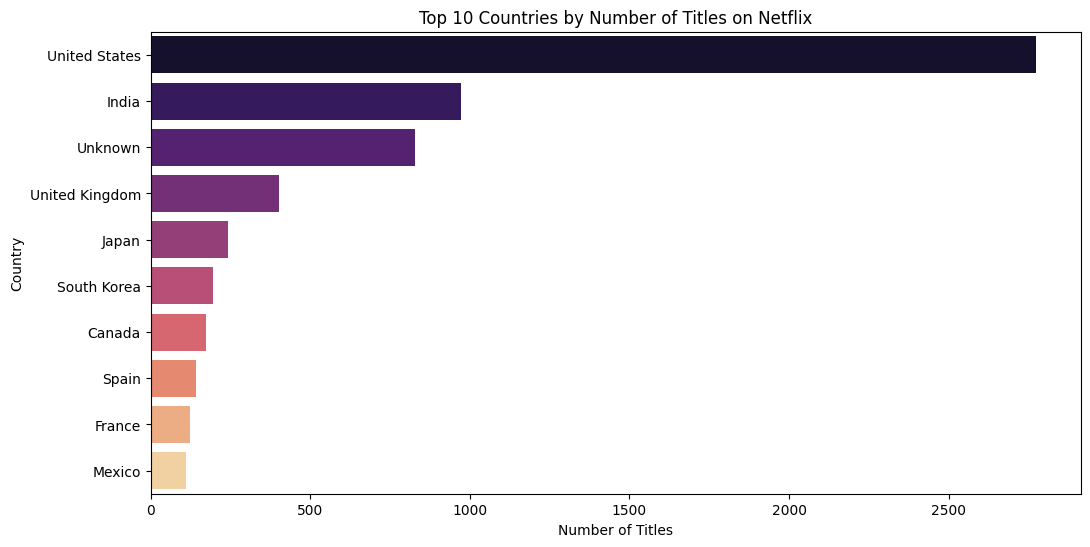

In [15]:
plt.figure(figsize=(12,6))
top_countries = df['country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Countries by Number of Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


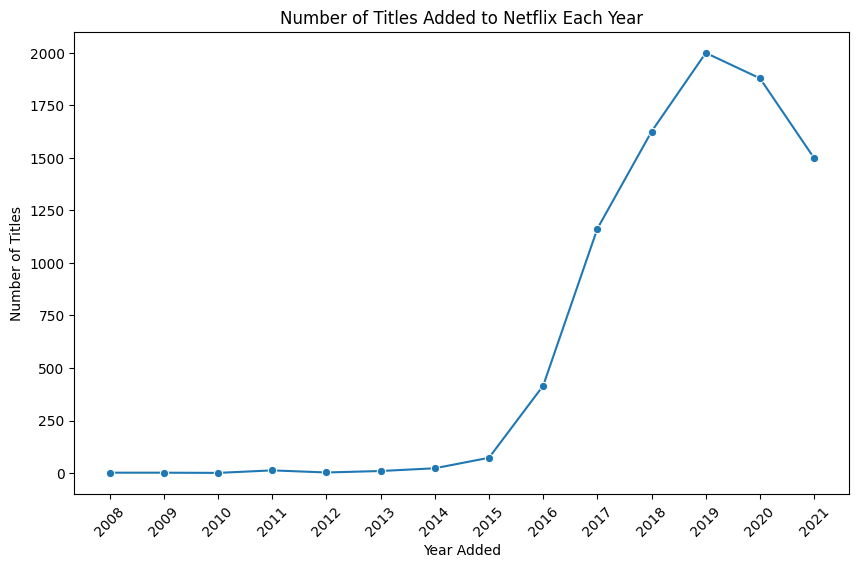

In [16]:
plt.figure(figsize=(10,6))
titles_per_year = df['year_added'].value_counts().sort_index()
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values, marker='o')
plt.title('Number of Titles Added to Netflix Each Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(titles_per_year.index, rotation=45)
plt.show()


In [6]:
print(df.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [7]:
df = df.drop_duplicates()


In [8]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)
